In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [2]:
%cd E:\ML1 datasets\DataSets

E:\ML1 datasets\DataSets


## Loading dataset

In [24]:
heartdata = pd.read_csv('healthcare.csv')

## Dimensions of dataset

In [25]:
heartdata.shape

(5110, 12)

## Attributes of dataset

In [26]:
heartdata.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Display first five records

In [33]:
heartdata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## By using the info() attribute we get:
the number of total number of entries=5110
columns = 12
and their datatypes include int64, float64 and object.

The non-null count of bmi column having datatype as float64 is 4909 which is less than the total number of entries, thus there are null or missing values in the data.

In [34]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## We can obtain the different values present in the non-numeric columns by using the valuecounts().

In [35]:
heartdata["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [36]:
heartdata["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Thus different values present in the smoking_status and gender column are displayed.
 

## We can explore the numeric attributes by using the describe() method.
This method displays the statistical measures associated with the dataset columns such as mean, 
standard deviation, minimum, maximum and also the quartiles where the dataset is divided
into 25%, 50% and 75% percentiles (or 1st, 2nd and 3rd quartile ranges).

In [38]:
heartdata.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Histogram

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

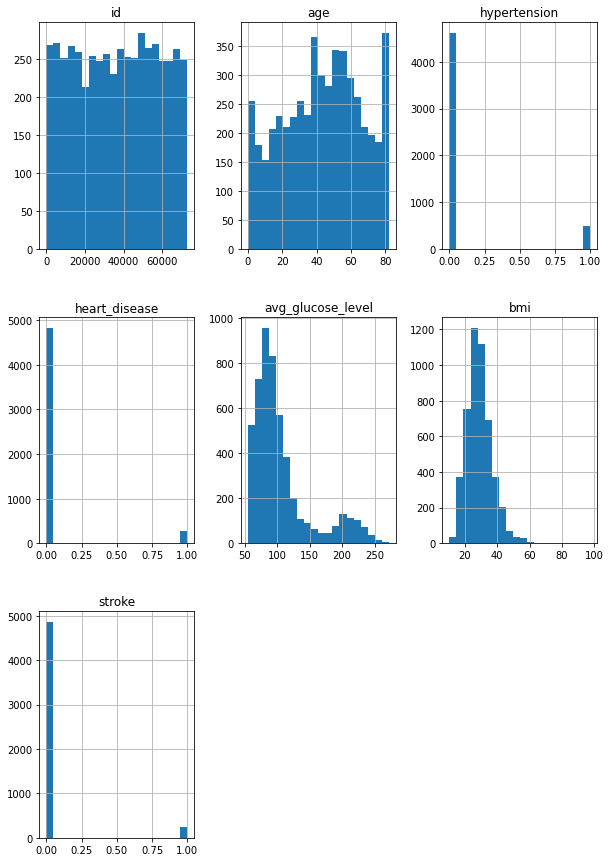

In [27]:
heartdata.hist(bins=20,figsize=(10,15))

## creating train and test set

In [28]:
hds_train, hds_test = train_test_split(heartdata, test_size=0.2, random_state=0)

In [29]:
hds_train.shape, hds_test.shape

((4088, 12), (1022, 12))

## The corr() method on the dataset is used to find correlations between every pair of attributes.

In [31]:
hds_corr_matrix = hds_train.corr()

In [32]:
hds_corr_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.012447,0.017678,0.006364,0.004815,0.006072,0.007234
age,0.012447,1.000000,0.272399,0.264708,0.227865,0.325041,0.249444
hypertension,0.017678,0.272399,1.000000,0.108100,0.175779,0.171521,0.106043
heart_disease,0.006364,0.264708,0.108100,1.000000,0.159974,0.039984,0.148952
avg_glucose_level,0.004815,0.227865,0.175779,0.159974,1.000000,0.173456,0.113906
bmi,0.006072,0.325041,0.171521,0.039984,0.173456,1.000000,0.032258
stroke,0.007234,0.249444,0.106043,0.148952,0.113906,0.032258,1.000000


Observations:
Attributes having Highest Correlation are bmi and age.
Attributes having Lowest Correlation are id and avg_glucose_level.

In [53]:
hds_corr_matrix["heart_disease"].sort_values(ascending=False)

heart_disease        1.000000
age                  0.264708
avg_glucose_level    0.159974
stroke               0.148952
hypertension         0.108100
bmi                  0.039984
id                   0.006364
Name: heart_disease, dtype: float64

We observe that age column shows the highest correlation with the heart_disease column.

## Scatter matrix of all attributes

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='hypertension', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='age'>,
        <AxesSubplot:xlabel='stroke', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='hypertension'>,
        <AxesSubplot:xlabel='hypertension', ylabel='hypertension'>,
        <AxesSubplot:xlabel='bmi', ylabel='hypertension'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='hypertension'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='hypertension'>,
        <AxesSubplot:xlabel='stroke', ylabel='hypertension'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='hypertension', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>,
        <AxesSubplot:xlabel='heart_disease', ylab

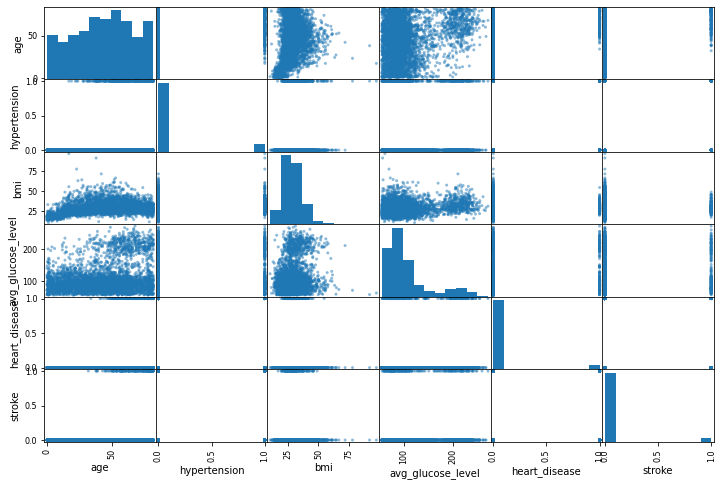

In [42]:
from pandas.plotting import scatter_matrix
attributes = ["age","hypertension","bmi","avg_glucose_level","heart_disease", "stroke"]
scatter_matrix(hds_train[attributes], figsize=(12, 8))

## Scatter plot of two attributes

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

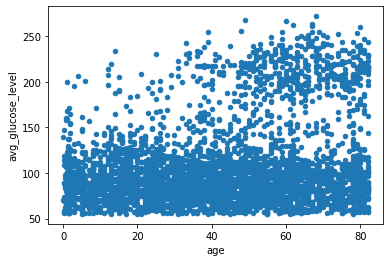

In [41]:
hds_train.plot(kind="scatter", x="age", y="avg_glucose_level")    #alpha=0.1

<AxesSubplot:xlabel='age', ylabel='bmi'>

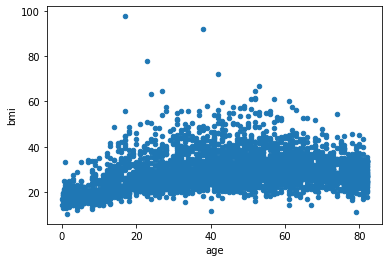

In [55]:
hds_train.plot(kind="scatter", x="age", y="bmi")

<AxesSubplot:xlabel='age', ylabel='heart_disease'>

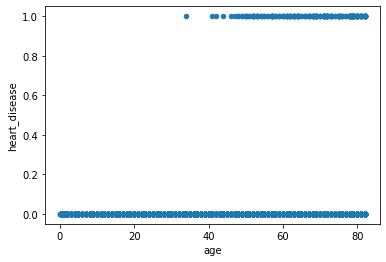

In [54]:
hds_train.plot(kind="scatter", x="age", y="heart_disease")